# Back Propagation
We have seen how the weights and biases affects the total output of the neural nw. To calculate the accuracy we try to find the loss from the n/w. Now the loss needs to be adjusted to make the
nw resilient. To adjust the loss we have to see how much each weight is contributing to the total loss. Then we adjust that weight likewise to make the n/w accurate.
To understand this even more lets start out with a single neuron with inputs ,weights, bias and activation function. 

# Single Neuron Forward Pass
 ![single neuron diag.PNG](<attachment:single neuron diag.PNG>)
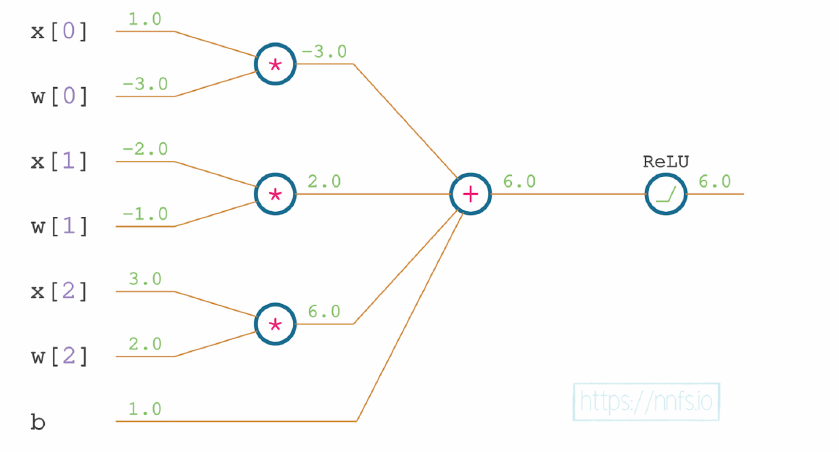

In [2]:
#single neuron
x = [1.0, -2.0, 3.0]
w = [-3.0, -1.0, 2.0]
b = 1.0

# weighted sum
ws = 0
inp_weight_mul = []
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b

print("Weighted Sum = ",z)

# Relu activation function
relu = max(z,0)
y = relu
print("Output after activation = ", y)

Weighted Sum =  6.0
Output after activation =  6.0


We saw above that the output y = ReLU(sum(mul(x0, w0), mul(x1,w1), mul(x2, w2), b)).
The above equation contains 3 nested functions: ReLU, a sum of weighted inputs and a bias, and
multiplications of the inputs and weights.
To calculate the impact of the example weight, w0,on
the output, the chain rule tells us to calculate the derivative of ReLU with respect to its parameter,
which is the sum, then multiply it with the partial derivative of the sum operation with respect to
its mul(x0
, w0
) input, as this input contains the parameter in question. Then, multiply this with the
partial derivative of the multiplication operation with respect to the x0
 input

 Lets see how it looks:


# BackPropagation wrt x0 (Impact of x0 on the Final Output)
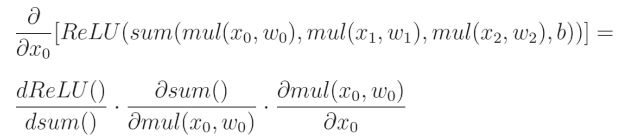

Based on what we get from this we can adjust the x0 accordingly.
But we know that inputs remains the same so the partial derivatives will be done wrt weights and biases (w and b) rather than x.
By knowing the change we can now adjust our weights and biases accordingly. Also later we will see how we can adjust loss to be minimum by using partial derivatives.

In [8]:
#single neuron
x = [1.0, -2.0, 3.0]
w = [-3.0, -1.0, 2.0]
b = 1.0

# weighted sum
ws = 0
inp_weight_mul = []
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b

print("Weighted Sum = ",z)

# Relu activation function
relu = max(z,0)
y = relu
print("Output after activation = ", y)

# Let us assume that the derivaative from the next layer = 1
dvalue = 1

# So assuming the above formula we can say that
# change needed = drelu_dsum * dsum_dxw0 * dxw0_dx0 wrt x0
# chnage needed = drelu_dsum * dsum_dxw0 * dxw0_dw0 wrt w0

# drelu_dsum
drelu_dsum = dvalue * (1 if z>0 else 0)

#dsum_dmulxw0
# dsum_dxw0 = d_dxw0(xw0 + xw1 + xw2) = 1 + 0 + 0 = 1 ... similar for xw1 and xw2
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1

# dsum_db = d_db(xw0 + xw1 + xw2 + b) = 0 + 0 + 0 + 1
dsum_db = 1

# dxw0_dx0 = d_dx0(x[0] * w[0]) = w[0] * 1 = w[0] ... similar for x1 and x2
# similarly dxw0_dw0 = d_dw0(x[0]*w[0]) = x[0] * 1 = x[0] ... similar for w1, w2 
dxw0_dx0 = w[0]
dxw1_dx1 = w[1]
dxw2_dx2 = w[2]

dxw0_dw0 = x[0]
dxw1_dw1 = x[1]
dxw2_dw2 = x[2]

# Delta Bias
drelu_db = drelu_dsum * dsum_db

# From the above formula we can see that 
# drelu_dsum = dvalue * (1 or 0)
# dsum_dxw = 1
# dxwn_dxn = w[n]
# so the easy formula for the drelu_dxn = davlue * (1 or 0) * 1 * w[n] = (1 or 0)*dvalue*w[n] 
delta_change_x0 = drelu_dsum * dsum_dxw0 * dxw0_dx0
delta_change_x1 = drelu_dsum * dsum_dxw1 * dxw1_dx1
delta_change_x2 = drelu_dsum * dsum_dxw2 * dxw2_dx2

print("Gradient x0 = ", delta_change_x0)
print("Gradient x1 = ", delta_change_x1)
print("Gradient x2 = ", delta_change_x2)

# From the above formula we can see that 
# drelu_dsum = dvalue * (1 or 0)
# dsum_dxw = 1
# dxwn_dwn = x[n]
# so the easy formula for the drelu_dwn = davlue * (1 or 0) * 1 * x[n] = (1 or 0)*dvalue*x[n] 
delta_change_w0 = drelu_dsum * dsum_dxw0 * dxw0_dw0
delta_change_w1 = drelu_dsum * dsum_dxw1 * dxw1_dw1
delta_change_w2 = drelu_dsum * dsum_dxw2 * dxw2_dw2

print("Gradient w0 = ", delta_change_w0)
print("Gradient w1 = ", delta_change_w1)
print("Gradient w2 = ", delta_change_w2)

print("Gradient Bias = ", drelu_db)

Weighted Sum =  6.0
Output after activation =  6.0
Gradient x0 =  -3.0
Gradient x1 =  -1.0
Gradient x2 =  2.0
Gradient w0 =  1.0
Gradient w1 =  -2.0
Gradient w2 =  3.0
Gradient Bias =  1


Continuing the single neuron example, we can now apply these gradients to the weights to
hopefully minimize the output. This is typically the purpose of the optimizer (discussed in the
following chapter), but we can show a simplified version of this task by directly applying a
negative fraction of the gradient to our weights. 

We apply a negative fraction to this gradient
since we want to decrease the final output value, and the gradient shows the direction of the
steepest ascent.

In [10]:
# From the above statements we are making a fractional -ve gradient change tp each weights and bias
# All weights and bias
print("Initial Weights and bias = ",w,b)

w[0] += -0.001 * delta_change_w0
w[1] += -0.001 * delta_change_w1
w[2] += -0.001 * delta_change_w2
b += -0.001 * drelu_db

print("After delta change Weights and Bias = ",w,b)

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b

#relu
relu = max(z,0)

y = relu

print(y)


Initial Weights and bias =  [-3.001, -0.998, 1.997] 0.999
After delta change Weights and Bias =  [-3.002, -0.996, 1.9940000000000002] 0.998
5.9700000000000015


We’ve successfully decreased this neuron’s output from 6.000 to 5.985. Note that it does not
make sense to decrease the neuron’s output in a real neural network; we were doing this purely as
a simpler exercise than the full network. We want to decrease the loss value, which is the last
calculation in the chain of calculations during the forward pass, and it’s the first one to calculate
the gradient during the backpropagation. We’ve minimized the ReLU output of a single neuron
only for the purpose of this example to show that we actually managed to decrease the value of
chained functions intelligently using the derivatives, partial derivatives, and chain rule

We’ve minimized the ReLU output of a single neuron
only for the purpose of this example to show that we actually managed to decrease the value of
chained functions intelligently using the derivatives, partial derivatives, and chain rule. Now,
we’ll apply the one-neuron example to the list of samples and expand it to an entire layer of
neurons. To begin, let’s set a list of 3 samples for input, where each sample consists of 4 features.
For this example, our network will consist of a single hidden layer, containing 3 neurons (lists of
3 weight sets and 3 biases).

In [3]:
import numpy as np

# lets consider the gradient from the next layer is 1
dvalue = np.array([[1.0, 1.0, 1.0]])

# we have 3 sets of weights -  one set for each neuron
# we have 4 inputs thus 4 weights

weights = np.array([[0.2,    0.8,   -0.5,      1],
                    [0.5,   -0.91,   0.26,    -0.5],
                    [-0.26, -0.27,   0.17,     0.87]]).T

print(weights)

dx0 = sum(weights[0])*dvalue[0]
dx1 = sum(weights[1])*dvalue[0]
dx2 = sum(weights[2])*dvalue[0]
dx3 = sum(weights[3])*dvalue[0]

dinputs = np.array([dx0, dx1, dx2, dx3])

print(dinputs)

[[ 0.2   0.5  -0.26]
 [ 0.8  -0.91 -0.27]
 [-0.5   0.26  0.17]
 [ 1.   -0.5   0.87]]
[array([0.44, 0.44, 0.44]), array([-0.38, -0.38, -0.38]), array([-0.07, -0.07, -0.07]), array([1.37, 1.37, 1.37])]
